In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
df = pd.read_excel("Health_premiums.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0


## Exploratory Data Analysis & Data Cleaning

### Handle Missing Values

In [6]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
genetical_risk            0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handle Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Analyzing numeric data 

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189,1.006563
std,15.000378,1.498195,24.221794,8419.995271,1.637968
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8607.750000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,0.000000
75%,45.000000,3.000000,31.000000,22273.500000,2.000000
max,356.000000,5.000000,930.000000,43471.000000,5.000000


#### Data Cleaning: number_of_dependants

In [11]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [12]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189,1.006563
std,15.000378,1.491953,24.221794,8419.995271,1.637968
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8607.750000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,0.000000
75%,45.000000,3.000000,31.000000,22273.500000,2.000000
max,356.000000,5.000000,930.000000,43471.000000,5.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

#### Box plots for numeric columns

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

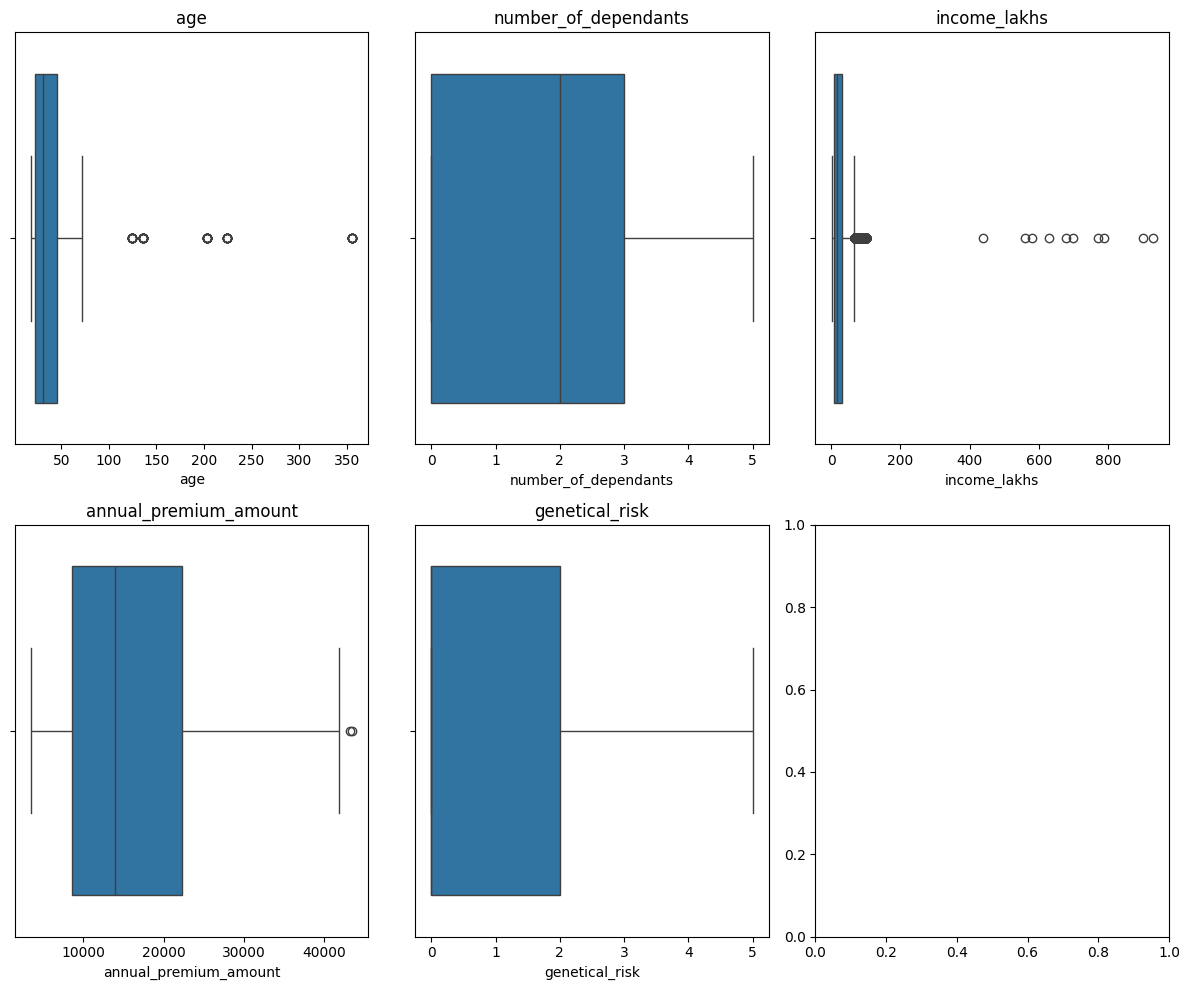

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Data Distribution Analysis

1. **Age Distribution:**
   - The box plot shows significant number of outliers
   - These outliers require further investigation to determine their impact on the analysis

2. **Number of Dependents:**
   - The distribution appears normal and well-behaved
   - No concerning outliers or anomalies detected

3. **Income Distribution:**
   - Shows a typical right-skewed (positive skew) pattern
   - This is common for income data as there are usually more people with lower incomes and fewer with very high incomes

4. **Annual Premium Amount:**
   - Contains only 2 outliers
   - The outliers show minimal deviation from the main distribution
   - No significant concern or need for treatment

5. **Genetical Risk:**
   - The distribution appears normal and well-behaved
   - No concerning outliers or anomalies detected

This summary provides a clear and structured view of the distribution patterns in your dataset.

### Outlier Treatment: Age Column

In [15]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [16]:
df1 = df[df.age<=100]
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

### Histogram

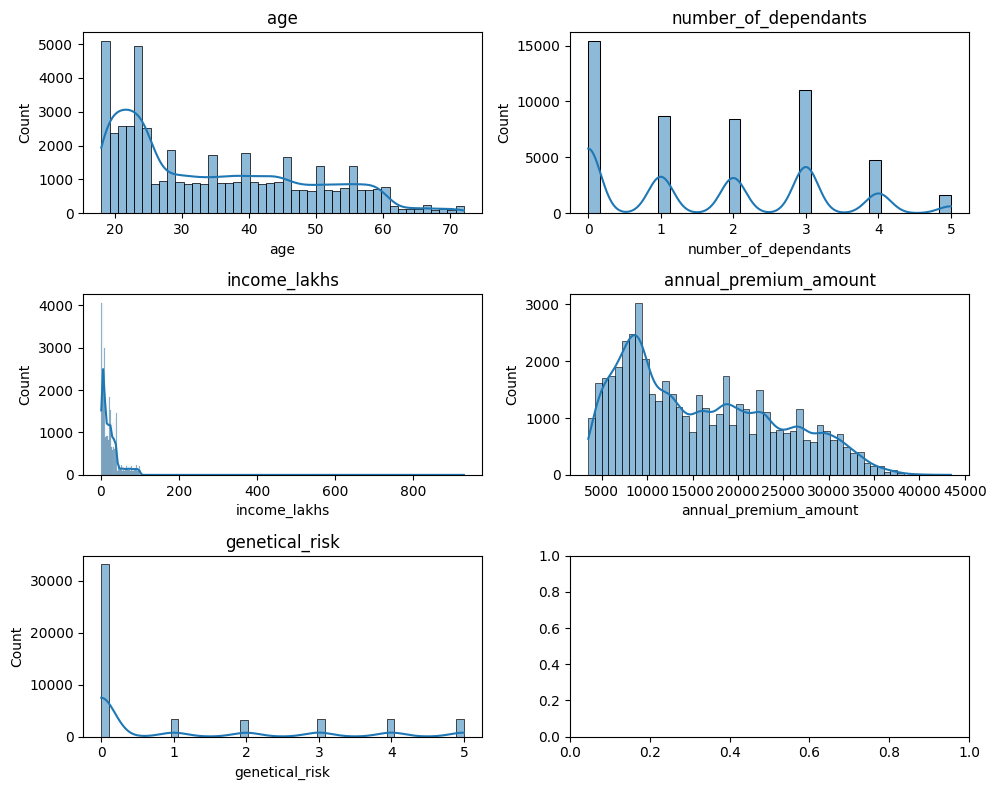

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df1[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### Bivariate Analysis: Numeric Columns

In [18]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

## 2. Analysis of Categorical Columns

In [19]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df1[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [20]:
df1['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df1['smoking_status'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_17424\2056166140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['smoking_status'].replace({
C:\Users\user\AppData\Local\Temp\ipykernel_17424\2056166140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

### Univariate Analysis

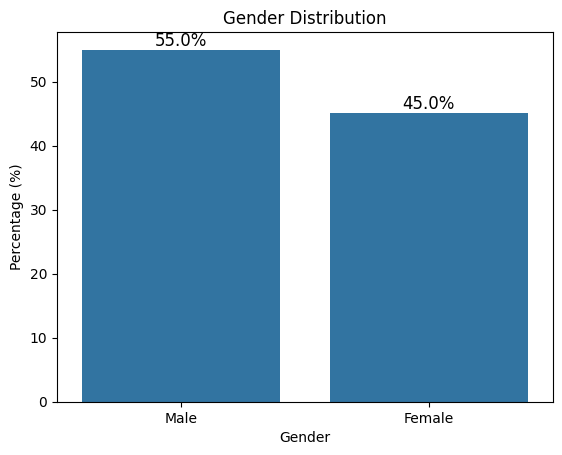

In [21]:
ax = sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts(normalize=True) * 100)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.title("Gender Distribution")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17424\2708420673.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_17424\2708420673.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_17424\2708420673.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_17424\2708420673.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

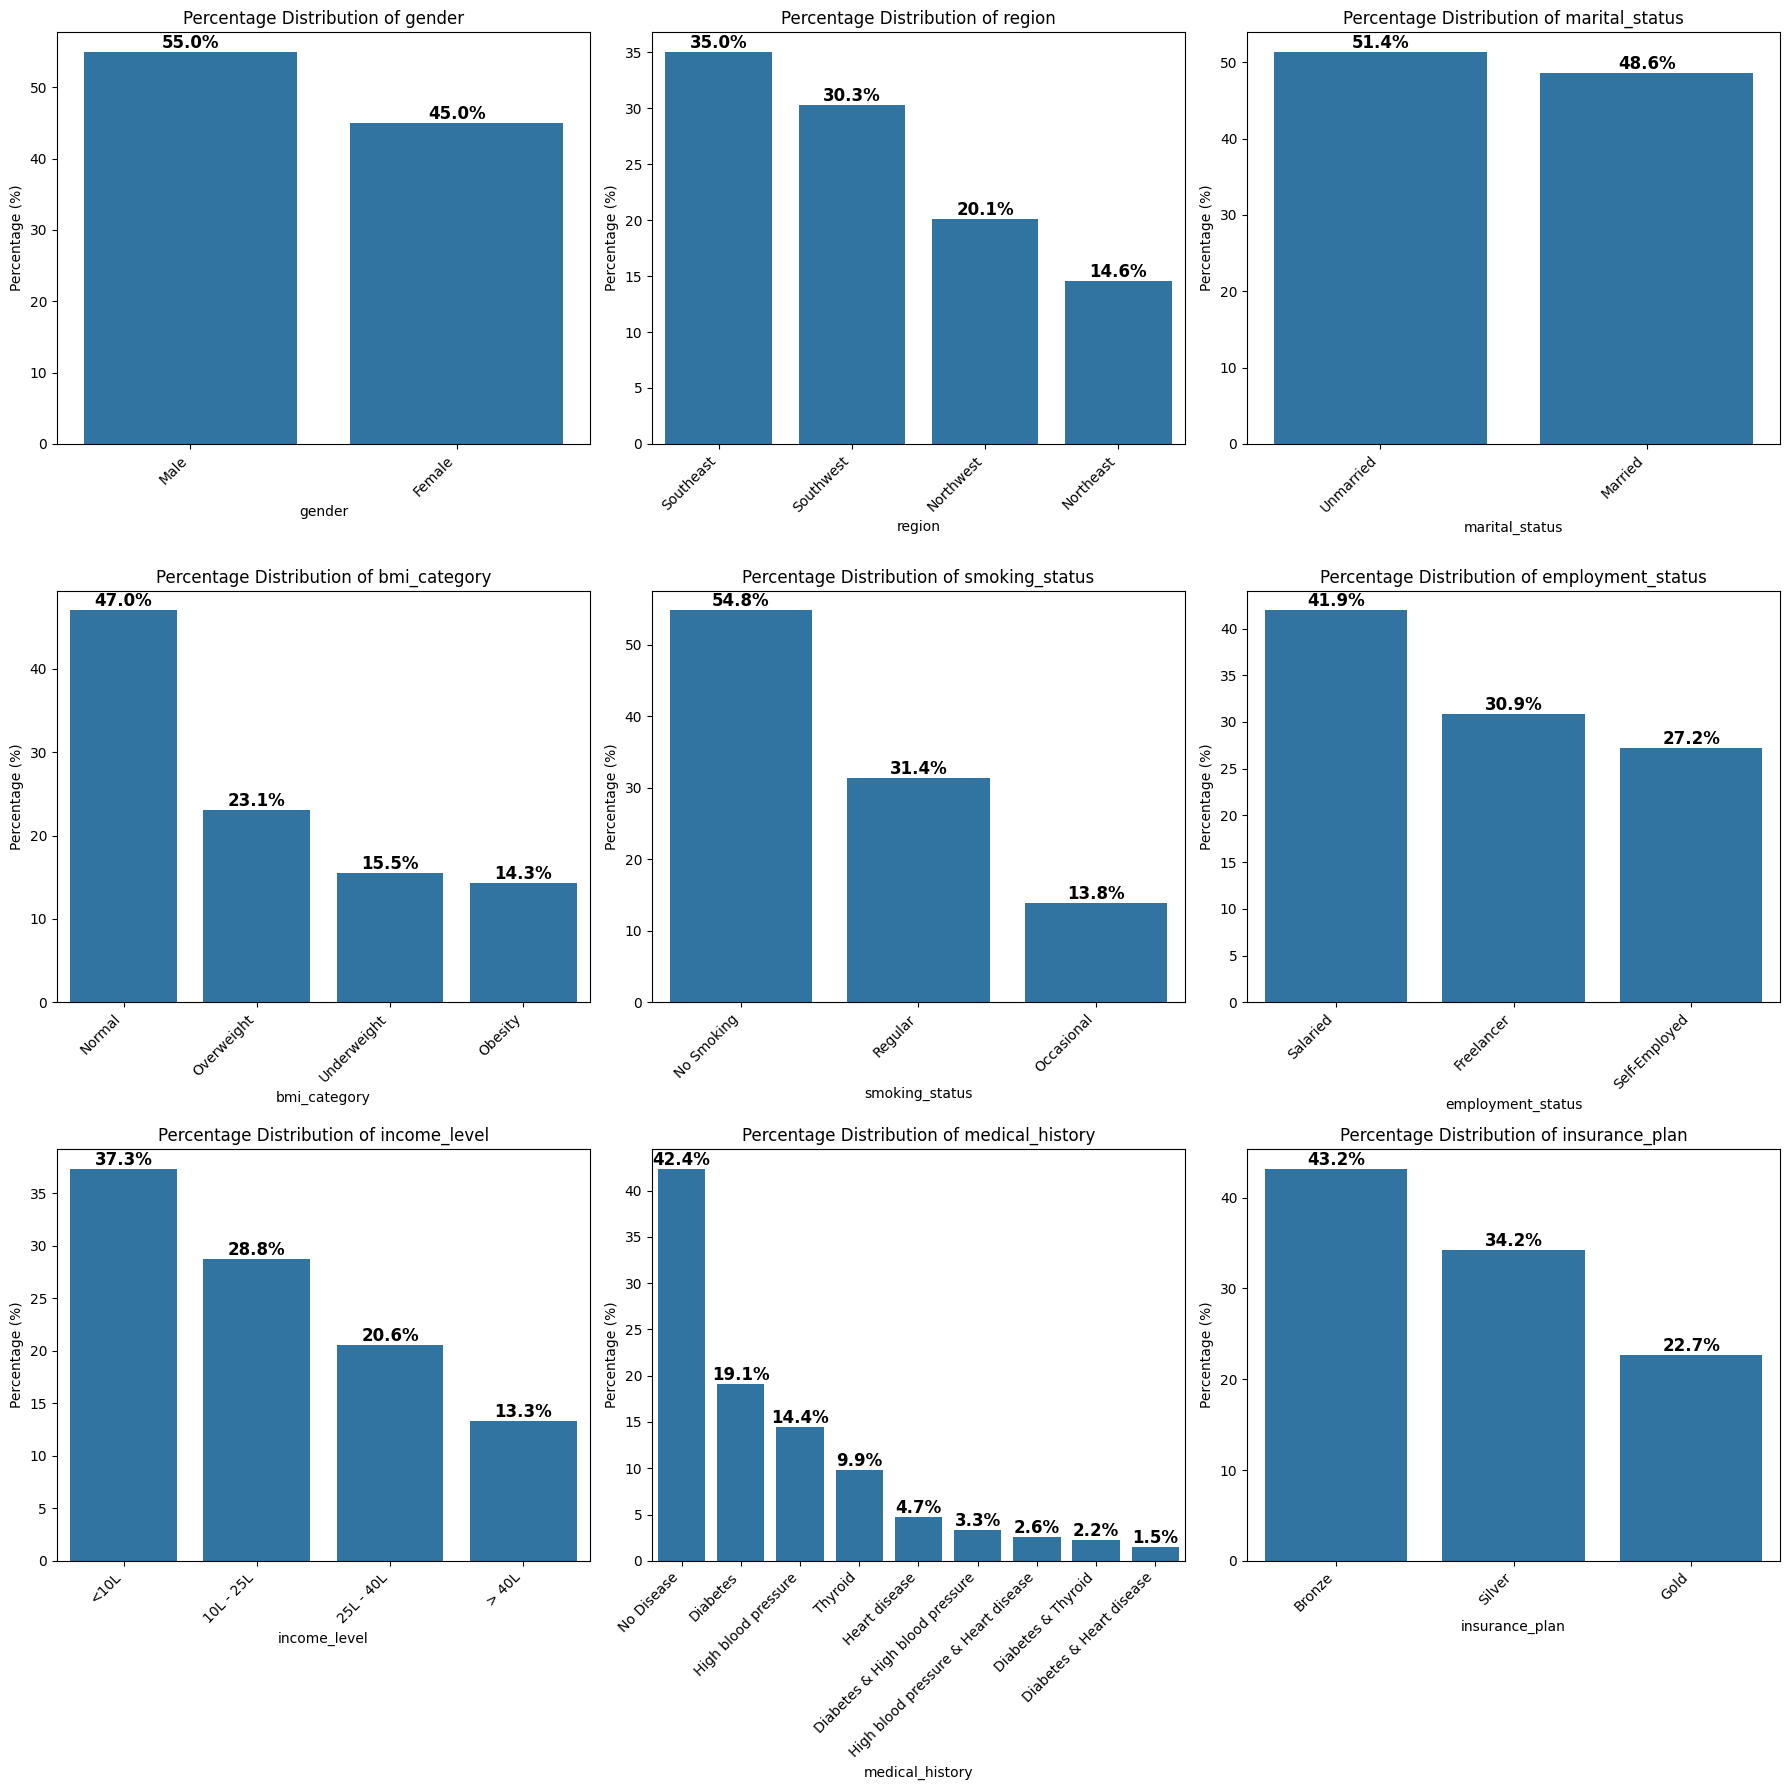

In [22]:
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust layout as needed
axes = axes.flatten()  # Flatten in case of multiple rows

for ax, column in zip(axes, categorical_cols):
    # Calculate percentage distribution
    category_counts = df1[column].value_counts(normalize=True) * 100  
    
    # Plot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    
    # Add annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Set labels and rotate x-ticks
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Bivariate Analysis

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              330  3658    2645


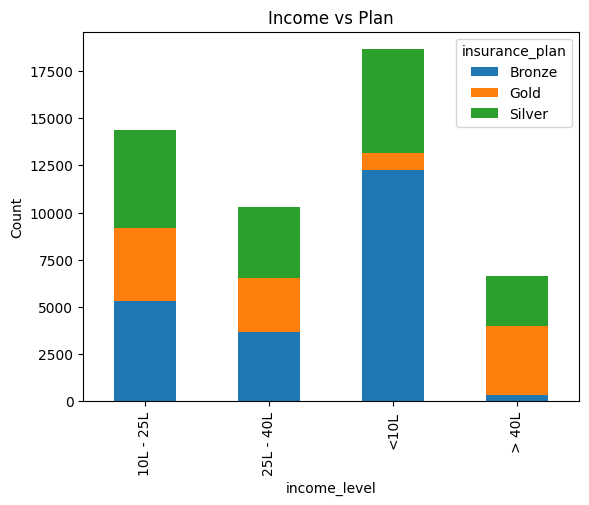

In [23]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df1['income_level'], df1['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

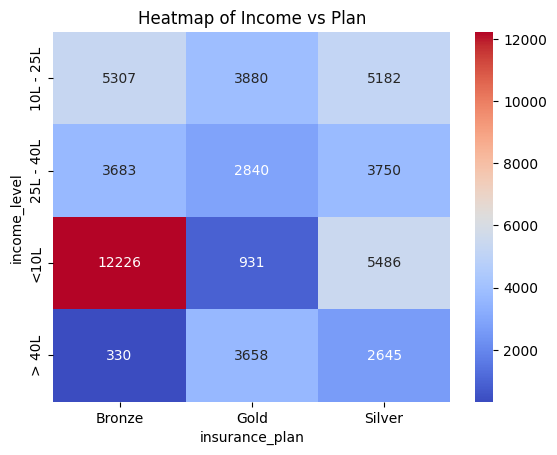

In [24]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

## Feature Engineering

In [25]:
df1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


### Calculate Risk Score

In [26]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df1[['disease1', 'disease2']] = df1['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df1['disease1'].fillna('none', inplace=True)
df1['disease2'].fillna('none', inplace=True)
df1['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df1['total_risk_score'] += df1[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df1['total_risk_score'].max()
min_score = df1['total_risk_score'].min()
df1['normalized_risk_score'] = (df1['total_risk_score'] - min_score) / (max_score - min_score)
df1.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_17424\3595791733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['disease1', 'disease2']] = df1['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
C:\Users\user\AppData\Local\Temp\ipykernel_17424\3595791733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['disease1', 'disease2']] = df1['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
C:\Users\user\AppData\Local\Temp\ipykernel_17424\35957

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


### Encode Text Columns

In [27]:
df1['insurance_plan'] = df1['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

C:\Users\user\AppData\Local\Temp\ipykernel_17424\2510590335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['insurance_plan'] = df1['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [28]:
df1.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [29]:

df1['income_level'] = df1['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

C:\Users\user\AppData\Local\Temp\ipykernel_17424\2330397390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income_level'] = df1['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})


In [30]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df2 = pd.get_dummies(df1, columns=nominal_cols, drop_first=True, dtype=int)
df2.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49918 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49918 non-null  int64  
 1   number_of_dependants             49918 non-null  int64  
 2   income_level                     49918 non-null  int64  
 3   income_lakhs                     49918 non-null  int64  
 4   medical_history                  49918 non-null  object 
 5   insurance_plan                   49918 non-null  int64  
 6   annual_premium_amount            49918 non-null  int64  
 7   genetical_risk                   49918 non-null  int64  
 8   disease1                         49918 non-null  object 
 9   disease2                         49918 non-null  object 
 10  total_risk_score                 49918 non-null  int64  
 11  normalized_risk_score            49918 non-null  float64
 12  gender_Male            

### Feature Selection

In [32]:
df3 = df2.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df3.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


### Calculate VIF for Multicolinearity

In [33]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

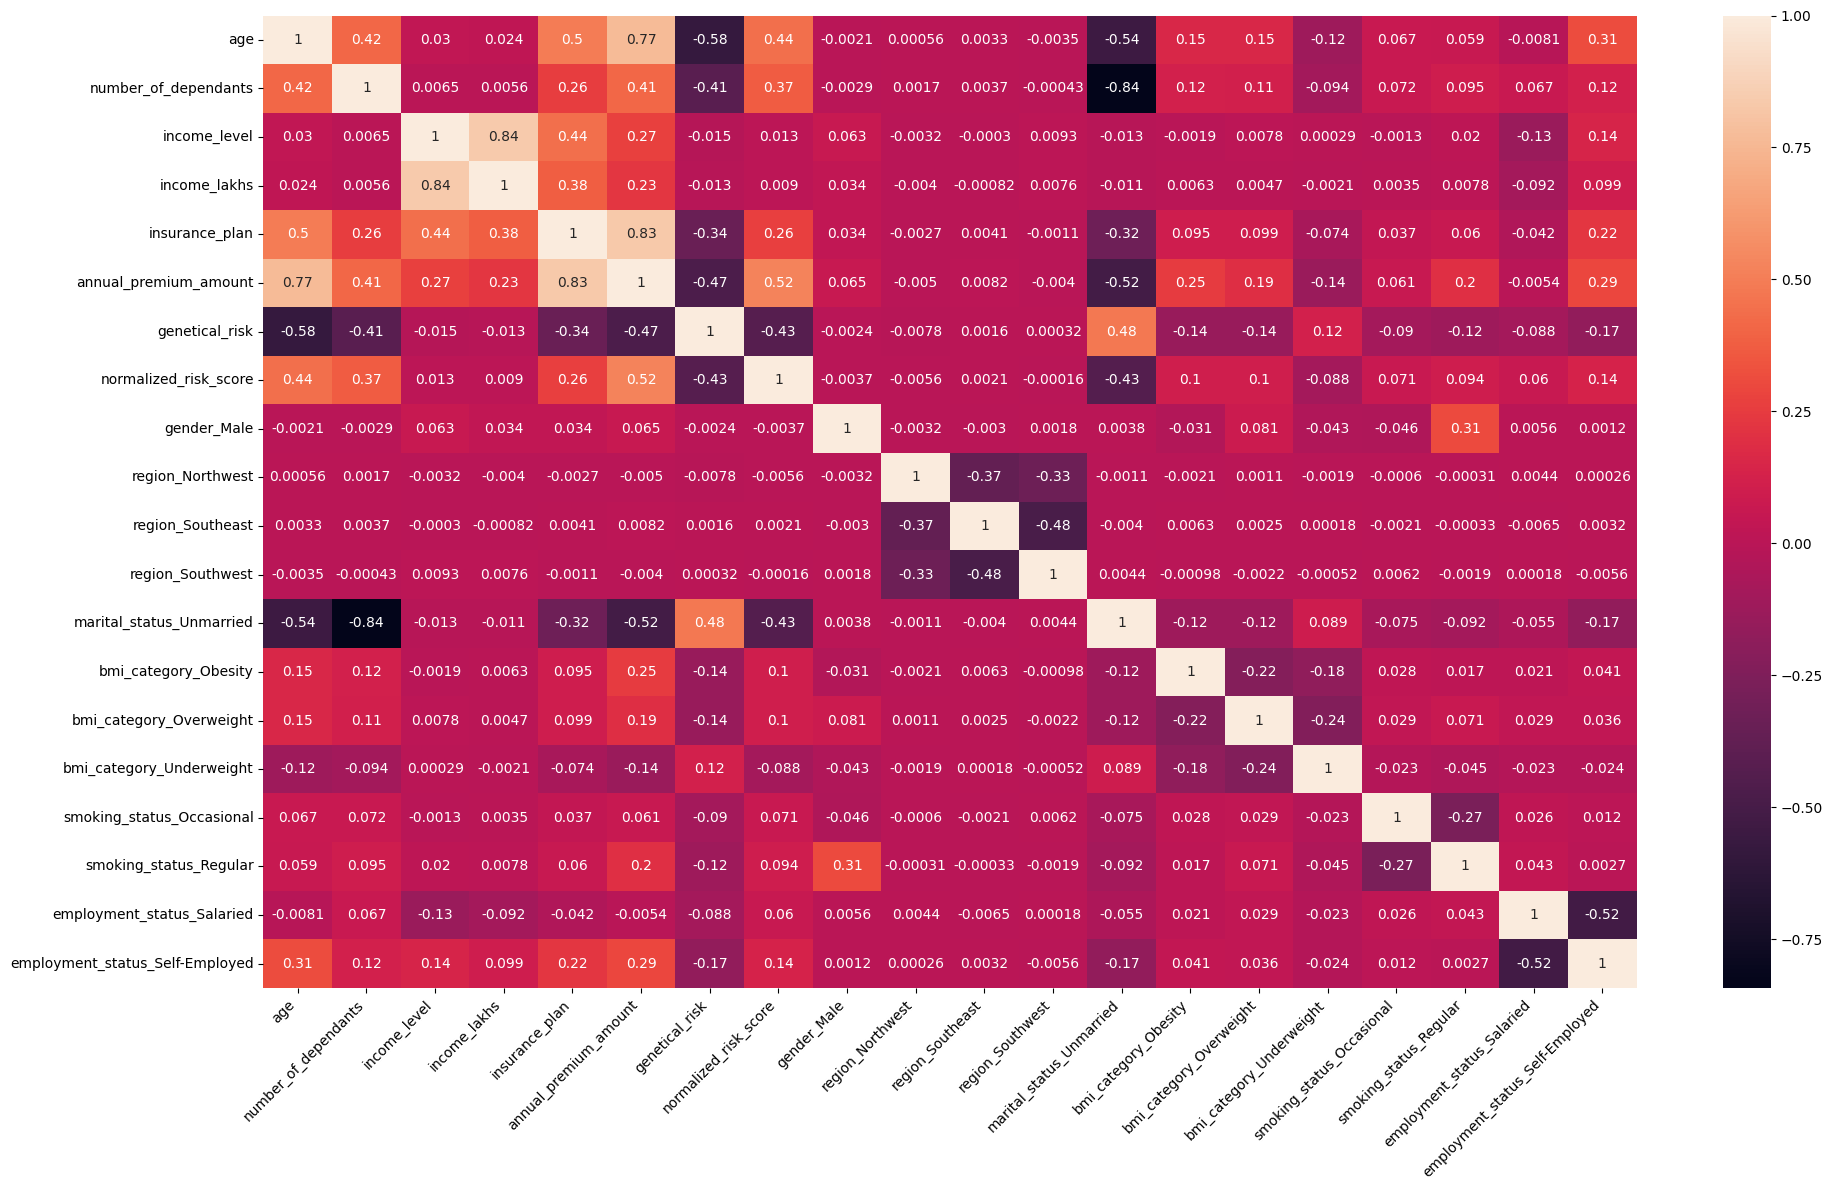

In [34]:
cm = df3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
X = df3.drop('annual_premium_amount', axis='columns')
y = df3['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000
mean,0.303738,0.343523,0.366027,0.023708,0.397462,0.201547,0.291829,0.549601,0.200950,0.350375,0.303017,0.513542,0.143255,0.231219,0.155315,0.138287,0.313815,0.419408,0.272026
std,0.253363,0.298415,0.349791,0.026080,0.392471,0.327712,0.287414,0.497539,0.400714,0.477092,0.459567,0.499822,0.350336,0.421616,0.362208,0.345204,0.464047,0.493467,0.445008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.006459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.017223,0.500000,0.000000,0.357143,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.032293,0.500000,0.400000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [37]:
calculate_vif(X)

,Column,VIF
0,age,4.842406
1,number_of_dependants,4.721848
2,income_level,7.772246
3,income_lakhs,6.213059
4,insurance_plan,3.595829
5,genetical_risk,2.136623
6,normalized_risk_score,2.725709
7,gender_Male,2.432939
8,region_Northwest,2.123358
9,region_Southeast,2.964526


In [38]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,4.810176
1,number_of_dependants,4.706777
2,income_lakhs,2.218592
3,insurance_plan,3.327693
4,genetical_risk,2.134022
5,normalized_risk_score,2.725176
6,gender_Male,2.422474
7,region_Northwest,2.121022
8,region_Southeast,2.960775
9,region_Southwest,2.700215


In [39]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

In [40]:
X_reduced.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

## Model Training

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34942, 18)
x test:  (14976, 18)
y train:  (34942,)
y test:  (14976,)


### Linear Regression Model

In [42]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.93431253711925, 0.9349754080442385)

In [43]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  4594837.736473642 RMSE:  2143.5572622334216


In [44]:
X_test.shape

(14976, 18)

In [45]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([12564.605583,  -355.712427, -4141.100572, 12629.963205,
        2652.664067,  5268.872893,   130.871081,   -12.743757,
          29.889243,    -6.713285, -1026.308504,  3472.745319,
        1682.479146,   297.306136,   856.884856,  2374.198029,
         311.557127,   450.139756])

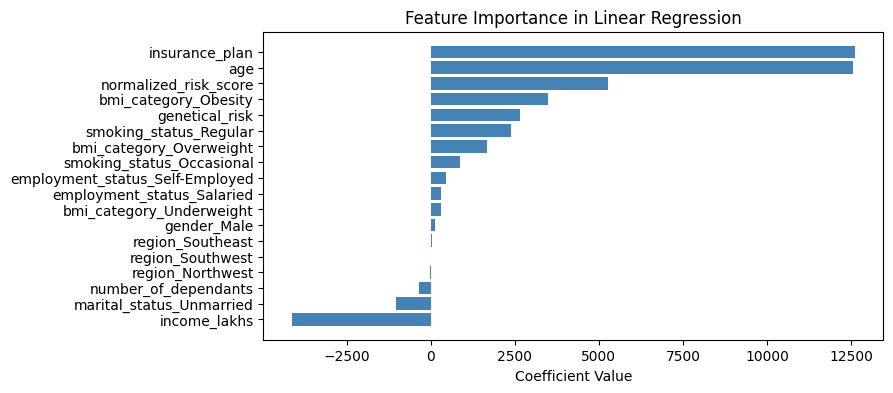

In [46]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression Model

In [47]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.9343121175527584, 0.9349798491991095)

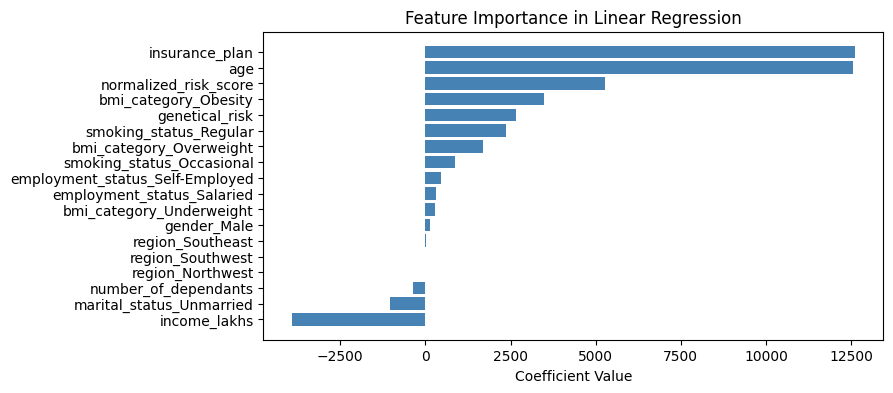

In [48]:
feature_importance = model_rg.coef_

# Create a DataFrame for easier handling
coef_df_rg = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df_rg = coef_df_rg.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df_rg.index, coef_df_rg['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [49]:
y_pred = model_rg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Ridge Regression ==> MSE:  4594523.910805831 RMSE:  2143.4840589110595


### XGBoost 

In [50]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9930897951126099

In [51]:
y_pred = model_xgb.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  488297.8125 RMSE:  698.7830940284689


In [52]:
import optuna

# Define objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 50),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.1, 0.2]),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
    }

    model = XGBRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best score and best parameters
print("Best R2 Score:", study.best_value)
print("Best Parameters:", study.best_params)


d:\Workspace\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-15 19:59:05,814] A new study created in memory with name: no-name-203ba2fb-9313-47a5-a78d-d0d4dbd9f2bf
[I 2025-03-15 19:59:05,918] Trial 0 finished with value: 0.9974780082702637 and parameters: {'n_estimators': 23, 'learning_rate': 0.2, 'max_depth': 5}. Best is trial 0 with value: 0.9974780082702637.
[I 2025-03-15 19:59:06,050] Trial 1 finished with value: 0.9921436309814453 and parameters: {'n_estimators': 32, 'learning_rate': 0.1, 'max_depth': 5}. Best is trial 0 with value: 0.9974780082702637.
[I 2025-03-15 19:59:06,177] Trial 2 finished with value: 0.5563430190086365 and parameters: {'n_estimators': 46, 'learning_rate': 0.01, 'max_depth': 3}. Best is trial 0 with value: 0.9974780082702637.
[I 2025-03-15 19:59:06,276] Trial 3 finish

Best R2 Score: 0.9986917972564697
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 5}


In [53]:
best_params = study.best_params
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.9986917972564697

## Analyzing Margin of Error 

In [54]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
11050,16643,17072.392578,429.392578,2.580019
28390,10872,10634.686523,-237.313477,-2.182795
33310,4656,4586.814941,-69.185059,-1.485933
13936,21802,22022.656250,220.656250,1.012092
47257,7459,7130.321777,-328.678223,-4.406465


In [55]:
results_df.describe()

,actual,predicted,diff,diff_pct
count,14976.000000,14976.000000,14976.000000,14976.000000
mean,15757.700721,15755.420898,-2.280292,0.069429
std,8406.413953,8395.209961,304.044672,3.065353
min,3501.000000,3916.709961,-1206.699219,-12.787576
25%,8595.000000,8613.389648,-250.746582,-1.617121
50%,13942.000000,14108.103516,-1.564941,-0.009060
75%,22228.500000,22460.880859,243.735596,1.623943
max,41658.000000,41305.652344,1252.205078,14.752129


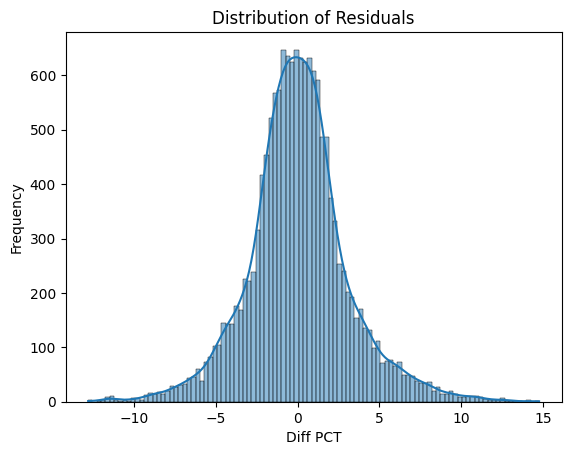

In [56]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

Some predictions show an error of up to 15%, which is not such a significant price variation.

In [57]:
X_test.shape

(14976, 18)

In [58]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
19345,4518,5022.552246,504.552246,11.167602
44356,8178,9011.895508,833.895508,10.196815
23787,5278,4693.422852,-584.577148,-11.075732
25361,4380,3916.709961,-463.290039,-10.577398
33257,3617,4057.415771,440.415771,12.176272


In [59]:
extreme_results_df.shape

(123, 4)

In [60]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

0.8213141025641025

the error above 10% is only 0.821% that means only 0.821% of people are charged above or below 10% which is not that significant 

In [61]:
from joblib import dump

#-----------------------------rerunning to correct minmax scalar  as we have dropped income_level column ----------------------
X_s = df3.drop('annual_premium_amount', axis='columns')
cols_to_scale = ['age','number_of_dependants', 'income_lakhs', 'insurance_plan','genetical_risk'] 
scaler = MinMaxScaler()
scaler.fit_transform(X_s[cols_to_scale])
#---------------------------------------------------

dump(best_model, 'artifact/insurance_premium_model.joblib')
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, 'artifact/scaler.joblib')

['artifact/scaler.joblib']

In [62]:
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}